# Proyecto: Análisis de mercado inmobiliario

¡Bienvenido/a al primer proyecto de la carrera de Data Science de Acamica! 

El objetivo de este proyecto es reproducir los pasos que haría un/a Data Scientist cuando se enfrenta a una problemática real. Por eso, consta de tres secciones:
* En la Parte 1, te presentamos la problemática sobre la cual vas a trabajar. En esta sección deberás decidir qué datos te ayudarán a trabajar en este problema y dónde puedes conseguirlos.
* En la Parte 2 te proveemos de un dataset para abordar la problemática planteada. Deberás realizar un Análisis Exploratorio de Datos sobre este dataset.
* En la Parte 3, deberás utilizar herramientas de Machine Learning para predecir la variable de interés.


En este proyecto vas a trabajar con un dataset de propiedades en venta publicado en el portal [Properati](www.properati.com.ar).

**Importante:** recuerda que un notebook es un informe, por lo que debes ir explicando lo que haces a medida que resuelves las consignas. Es importante que quien que lo lea entienda el flujo de trabajo, qué quisiste hacer. Recuerda, simple y conciso es una combinación ganadora. 

## Problema

Recientemente te has incorporado al equipo de Datos de una gran inmobiliaria. La primera tarea que se te asigna es ayudar a los tasadores/as a valuar las propiedades, ya que es un proceso difícil y, a veces, subjetivo. Para ello, propones crear un modelo de Machine Learning que, dadas ciertas características de la propiedad, prediga su precio de venta.

### 1. Pensando como un/a Data Scientist

Responde la siguientes pregunta:
1. ¿Qué datos crees que te ayudarían a trabajar en el problema?¿Por qué?

**Importante**: NO deberás buscar esos datos, solamente justificar qué información crees que te ayudaría a resolver la problemática planteada.

**Respuesta:**

1. Provincia
2. Barrio
3. Ambientes
4. Habitaciones
5. Baños
6. Metros cuadrados
7. Metros cuadrados cubiertos
8. Precio
9. Moneda
10. Si acepta planes de pago
11. Tipo de propiedad
12. Tipo de operacion
13. Proximidad a transporte publico
14. Amenities disponibles
15. Antiguedad
16. Valor de las expensas


  La provincia y el barrio nos indican la ubicacion del inmueble. (1 y 2).  
  Las habitaciones, baños, ambientes, metros cuadrados totales, y metros cuadrados descubiertos, nos indican la dimension del mismo. (3, 4, 5, 6 y 7).  
  El precio, la moneda y la financiacion, nos brindan una idea sobre el aspecto economico de la propiedad. (8, 9 y 10).  
  El tipo de operacion y el tipo de inmueble, son fundamentales para filtrar en base a las necesidades de los potenciales compradores/inquilinos. (11 y 12).  
  La proximidad a un transporte publico es importante para la gente que se mueve por la ciudad por este medio. (13).  
  Los amenities disponibles nos dan un plus sobre la propiedad. (14).  
  La antiguedad es un parametro que nos puede ayudar a entender el estado de la propiedad. (15).  
  El valor de las expensas es importante si se trata de un departamento o un barrio cerrado, ya que es un costo fijo mensual.(16)

---

<br />
<br />

# RESPONDER SECCIÓN 1 ANTES DE CONTINUAR
<br />
<br />

---

### 2. Análisis Exploratorio de Datos

En esta sección, debes realizar un Análisis Exploratorio de Datos sobre el dataset de propiedades de Properati. Es importante que respondas las siguientes preguntas durante el análisis:

* ¿Qué tamaño tiene el dataset?¿Cuántas instancias y cuántas columnas?
* ¿Cuántos valores faltantes hay en cada columna?
* ¿Cómo es la distribución de cada variable? Deberás hacer histogramas para las variables numéricas y gráficos de barras para las variables categóricas.
* ¿Cómo se relacionan las variables entre sí?¿Qué tipo de gráfico será conveniente para presentar esta información?
* ¿Cómo están correlacionadas las variables numéricas?¿Qué tipo de gráfico será conveniente para presentar esta información?¿Cuáles serán los mejores predictores de la variable de interés?

Vas a encontrar instrucciones para responder estas preguntas. Es importante aclarar que estas instrucciones corresponden al **mínimo entregable** que esperamos en la consigna.

**Comentarios sobre el dataset** 
1. Nosotros ya hicimos un *curado* sobre el dataset que puedes descargar directamente de la página de Properati. Muchos de los pasos que hicimos para curar el conjunto de datos los veremos durante el Bloque 2 de la carrera.

2. Si tienes dudas sobre qué representa alguna de las columnas, puedes consultar [aquí](https://www.properati.com.ar/data/). Notarás que algunas columnas fueron descartadas.

3. `Capital Federal` refiere a la Ciudad de Buenos Aires. `Bs.As. G.B.A. Zona Norte`, `Bs.As. G.B.A. Zona Sur` y `Bs.As. G.B.A. Zona Oeste` son regiones que conforman el [Gran Buenos Aires](https://es.wikipedia.org/wiki/Gran_Buenos_Aires), un conjunto de ciudades que rodean a la Ciudad de Buenos Aires.



0. Importa las librerías necesarias para trabajar en la consigna.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


1. Carga el dataset usando las funcionalidades de Pandas. Imprimir cuántas filas y columnas tiene, y sus cinco primeras instancias.

In [2]:
properati = pd.read_csv('DS_Proyecto_01_Datos_Properati.csv')

print('Cantidad de Filas y columnas:',properati.shape)


Cantidad de Filas y columnas: (146660, 19)


In [3]:
properati.head()

,start_date,end_date,created_on,lat,lon,l1,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,currency,title,description,property_type,operation_type
0,2019-10-17,2019-12-23,2019-10-17,-34.605880,-58.384949,Argentina,Capital Federal,San Cristobal,7.0,7.0,2.0,140.0,140.0,153000.0,USD,"***Venta semipiso centro, ideal hostel*****",DESCRIPCION DE LA PROPIEDAD: Departamento de 1...,Departamento,Venta
1,2019-10-17,2019-11-21,2019-10-17,-34.624056,-58.412110,Argentina,Capital Federal,Boedo,2.0,1.0,2.0,70.0,58.0,159000.0,USD,Espectacular PH reciclado en Boedo sin expensas.,PH reciclado en Boedo a una cuadra de la plaz...,PH,Venta
2,2019-10-17,2019-11-01,2019-10-17,-34.593569,-58.427474,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,45.0,45.0,125000.0,USD,Depto.tipo casa de 2 ambientes en Venta en Pal...,"2 ambienets amplio , excelente estado , patio ...",PH,Venta
3,2019-10-17,2019-12-23,2019-10-17,-34.581294,-58.436754,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,85.0,50.0,295000.0,USD,COSTA RICA 5800 / PALERMO HOLLYWOOD / VENTA PH...,HERMOSO PH EN PALERMO!!!2 AMBIENTES TOTALMENTE...,PH,Venta
4,2019-10-17,2020-03-11,2019-10-17,-34.914194,-57.938219,Argentina,Bs.As. G.B.A. Zona Sur,La Plata,2.0,1.0,1.0,50.0,35.0,40000.0,USD,58 entre 1 y 2 Venta de departamento en ph.1 ...,58 entre 1 y 2 Venta de departamento en PH. P...,PH,Venta


2. **Valores Faltantes**: imprime en pantalla los nombres de las columnas y cuántos valores faltantes hay por columna.

In [4]:
print("Aqui podemos observar cuantos valores faltantes hay por columna:")
properati.isna().sum()

Aqui podemos observar cuantos valores faltantes hay por columna:


start_date             0
end_date               0
created_on             0
lat                 9925
lon                 9959
l1                     0
l2                     0
l3                     0
rooms                  0
bedrooms               0
bathrooms           5957
surface_total      20527
surface_covered    21614
price                  0
currency               0
title                  0
description            0
property_type          0
operation_type         0
dtype: int64

3. **Tipos de propiedad**: ¿Cuántos tipos de propiedad hay publicados según este dataset?¿Cuántos instancias por cada tipo de propiedad hay en el dataset? Responde esta pregunta usando las funcionalidad de Pandas y con un gráfico apropiado de Seaborn. **Pistas**: Te puede ser útil googlear cómo rotar las etiquetas del eje x.

In [5]:
datosp3 = properati["property_type"].value_counts()
print("Puede visualizar cuantas instancias pertenecen a cada tipo de priopiedad en la siguente linea:")
print(datosp3)

Puede visualizar cuantas instancias pertenecen a cada tipo de priopiedad en la siguente linea:
Departamento       107326
Casa                21521
PH                  14298
Lote                 1312
Oficina               658
Otro                  374
Local comercial       325
Casa de campo         322
Depósito              265
Cochera               259
Name: property_type, dtype: int64


Text(-14.949999999999996, 0.5, 'Cantidad de propiedades')

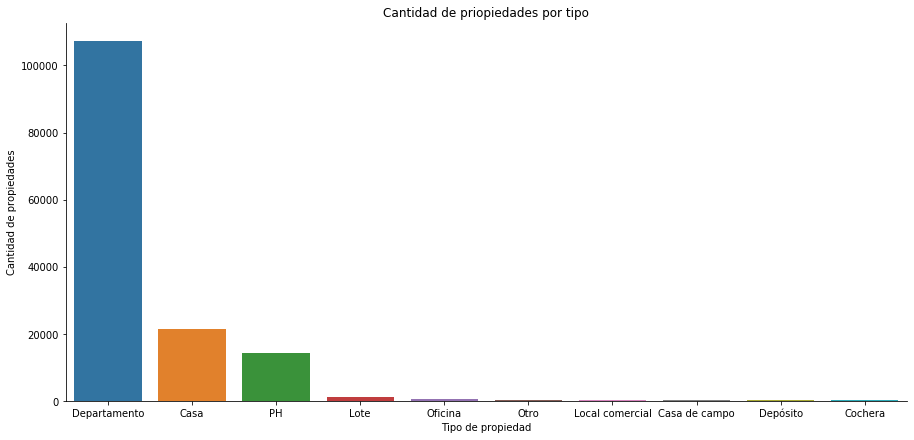

In [6]:
sns.catplot(x = "property_type", data = properati, kind = "count", height=6, aspect=2.1, order=properati.property_type.value_counts().index)
plt.title('Cantidad de priopiedades por tipo')


plt.xlabel('Tipo de propiedad')
plt.ylabel('Cantidad de propiedades')

Como podemos observar, los tres tipos de propiedades que mas instancias tienen, son los departamentos, las casas y los PH's.

4. ¿De qué regiones son las publicaciones? Haz gráficos de barras para las variables `l2` y `l3`. Si te animas, puedes hacer los dos gráficos usando `subplot` de Matplotlib. Dale un tamaño apropiado a la figura para que ambos gráficos se visualicen correctamente.

Text(-8.700000000000003, 0.5, 'Cantidad')

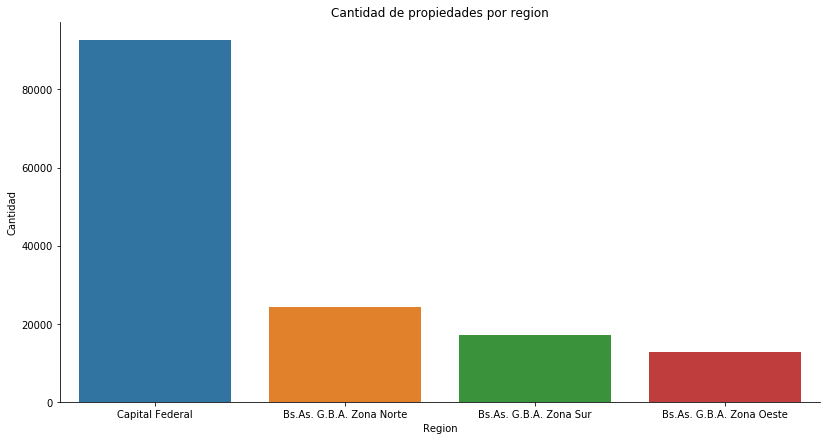

In [7]:
sns.catplot(x = "l2", data = properati, kind = "count", height=6, aspect=1.9, order=properati.l2.value_counts().index)

plt.title('Cantidad de propiedades por region')

plt.xlabel('Region')
plt.ylabel('Cantidad')

#En el siguiente grafico, vemos como es la division de instancias segun cada region. La mas predominante es Capital Federal.

Text(-8.824999999999946, 0.5, 'Cantidad')

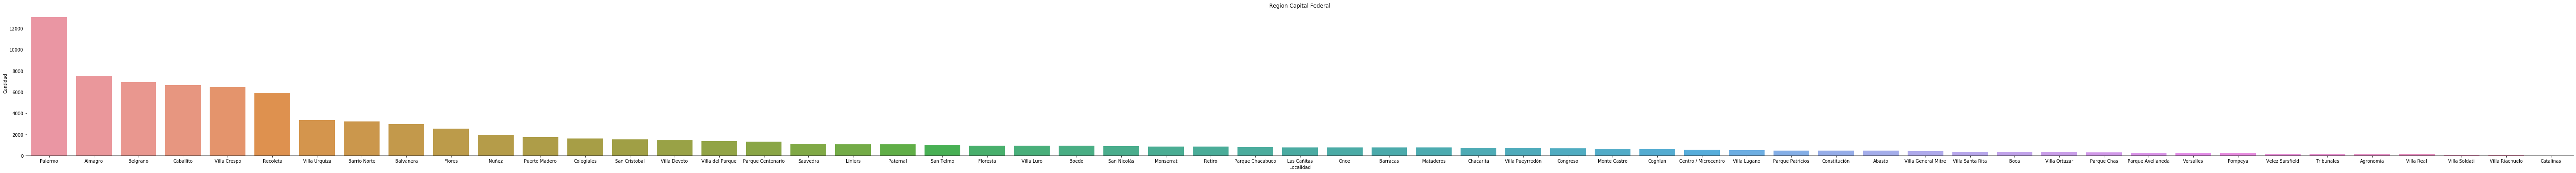

In [39]:
propiedades_capital = properati[(properati.l2=="Capital Federal")]
g=sns.catplot(x = "l3", data = propiedades_capital, kind = "count", height=7.5, aspect=10, order=propiedades_capital.l3.value_counts().index)
g.fig.set_size_inches( 80,5)
plt.title('Region Capital Federal')
plt.xlabel('Localidad')
plt.ylabel('Cantidad')

#En el grafico vemos la cantidad de propiedades publicadas segun el barrio correspondiente a la region filtrada.

In [1]:
propiedades_sur = properati[(properati.l2=="Bs.As. G.B.A. Zona Sur")]
sns.catplot(x = "l3", data = propiedades_sur, kind = "count", height=7.5, aspect=2.5, order=propiedades_sur.l3.value_counts().index)
plt.title('Region Zona Sur')
g.fig.set_size_inches(20,5)
plt.xlabel('Localidad')
plt.ylabel('Cantidad')

#En el grafico vemos la cantidad de propiedades publicadas segun el barrio correspondiente a la region filtrada.

NameError: name 'properati' is not defined

Text(-2.450000000000003, 0.5, 'Cantidad')

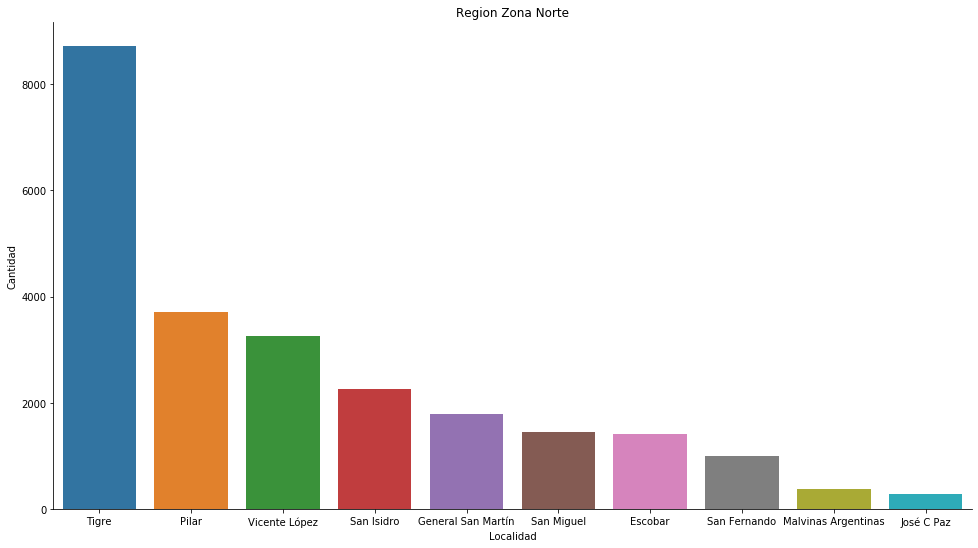

In [10]:
propiedades_norte = properati[(properati.l2=="Bs.As. G.B.A. Zona Norte")]
sns.catplot(x = "l3", data = propiedades_norte, kind = "count", height=7.5, aspect=1.8, order=propiedades_norte.l3.value_counts().index);
plt.title('Region Zona Norte')

plt.xlabel('Localidad')
plt.ylabel('Cantidad')

#En el grafico vemos la cantidad de propiedades publicadas segun el barrio correspondiente a la region filtrada.

Text(-2.575000000000003, 0.5, 'Cantidad')

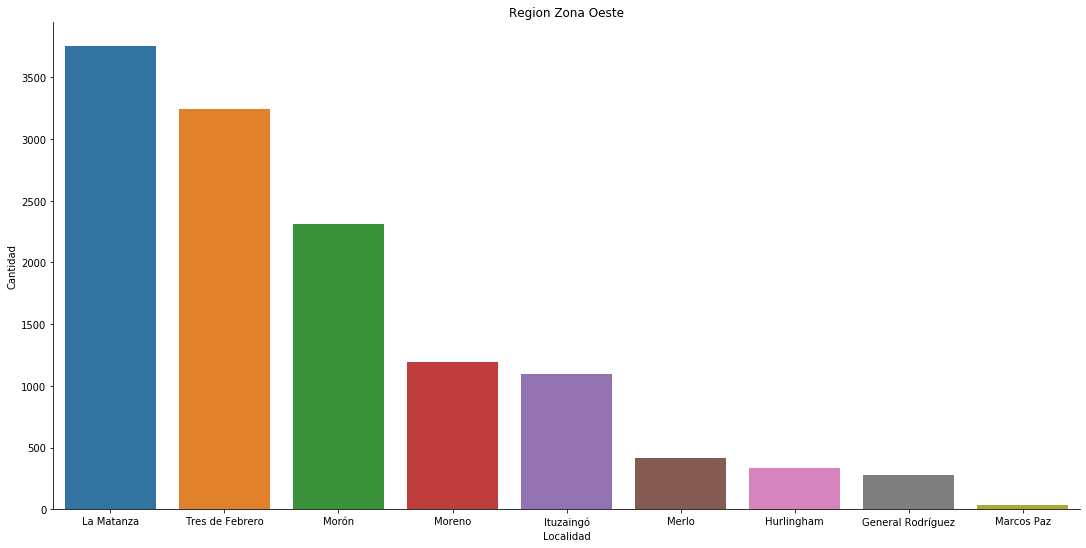

In [11]:
propiedades_oeste= properati[(properati.l2=="Bs.As. G.B.A. Zona Oeste")]
sns.catplot(x = "l3", data = propiedades_oeste, kind = "count", height=7.5, aspect=2, order=propiedades_oeste.l3.value_counts().index)
plt.title('Region Zona Oeste')

plt.xlabel('Localidad')
plt.ylabel('Cantidad')

#En el grafico vemos la cantidad de propiedades publicadas segun el barrio correspondiente a la region filtrada.

5. **Filtrando el Dataset:** A partir de los resultados del punto 3. y 4., selecciona las tres clases más abundantes de tipos de propiedad y la región con más propiedades publicadas. Crea un nuevo Data Frame con aquellas instancias que cumplen con esas condiciones e imprime su `shape`.

In [12]:
propiedades_p5 = propiedades_capital[(propiedades_capital.property_type=="Departamento") | (propiedades_capital.property_type=="PH") | (propiedades_capital.property_type=="Casa") ]


propiedades_p5.shape

(91485, 19)

**Checkpoint:** deberías tener un dataset con 91485 instacias, 19 columnas.

6. **Distribuciones y relaciones de a pares:** Estudia la distribución y las relaciones de a pares de las variables `rooms`, `bedrooms`, `bathrooms`, `surface_total`, `surface_covered`, `price` para cada tipo de propiedad. Para ello, ten en cuenta:
    1. Obtiene estadísticos que te sirvan para tener una primera idea de los valores que abarcan estas variables. ¿Cuáles crees que toman valores que tal vez no tengan mucho sentido?
    1. Algunas instancias tienen valores de superficie (`surface_total`) muy grandes y dificultan la correcta visualización. Estudia la distribución de esa variable y filtra por un valor razonable que te permita obtener gráficos comprensibles. Puede ser útil un boxplot para determinar un rango razonable.
    1. Lo mismo ocurre con valores de superficie total muy chico.
    1. Las propiedades no pueden tener `surface_covered` mayor a `surface_total`. Si eso sucede, debes filtrar esas instancias.
    1. El rango de precios que toman las propiedades es muy amplio. Estudia la distribución de esa variable y filtra por un valor razonable que te permita obtener gráficos comprensibles. Puede ser útil un boxplot para determinar un rango razonable.
    1. Una vez filtrado el dataset, puedes utilizar la función `pairplot` de Seaborn.

#### Punto A

In [13]:
propiedades_p5.describe()

,lat,lon,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
count,86951.000000,86937.000000,91485.000000,91485.000000,89314.000000,82568.000000,82250.000000,9.148500e+04
mean,-34.599081,-58.436002,2.964278,1.960278,1.560147,112.626369,94.966310,2.595003e+05
std,0.023957,0.036297,1.314704,1.072946,0.860309,980.713664,778.515243,3.222654e+05
min,-34.696419,-58.530468,1.000000,0.000000,1.000000,10.000000,1.000000,6.000000e+03
25%,-34.613757,-58.459605,2.000000,1.000000,1.000000,49.000000,44.000000,1.200000e+05
50%,-34.599446,-58.433789,3.000000,2.000000,1.000000,71.000000,63.000000,1.750000e+05
75%,-34.584148,-58.410143,4.000000,3.000000,2.000000,111.000000,96.000000,2.790000e+05
max,-34.535818,-58.353930,26.000000,15.000000,14.000000,126062.000000,126062.000000,3.243423e+07


Por lo que pude observar en la tabla que ofrece la función describe, encuentro que tenemos una o más instancias cuya superficie cubierta es de 1 metro cuadrado. Este valor no cobra mucho sentido para el análisis, ya que lo entiendo como un outlier. El objetivo del proyecto es depurar de estas instancias al dataset para que una vez de hecho este paso, nuestro modelo de machine learning sea entrenado con el mejor input que logremos depurar. Esto hará que nuestro error de predicción sea el más bajo posible.

#### Punto B y C

Text(0, 0.5, 'm2')

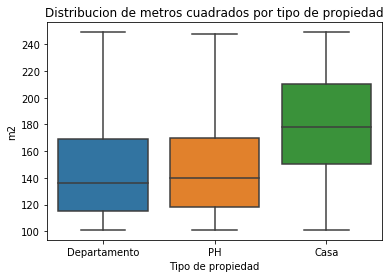

In [14]:

propiedades_pB =  propiedades_p5[(propiedades_p5.surface_total<250) & (propiedades_p5.surface_total>100)]

sns.boxplot(data = propiedades_pB, x = 'property_type', y = "surface_total")
plt.title('Distribucion de metros cuadrados por tipo de propiedad')

plt.xlabel('Tipo de propiedad')
plt.ylabel('m2')



#### Punto D

In [15]:
propiedades_pD =  propiedades_pB[(propiedades_pB.surface_total>=propiedades_pB.surface_covered)]

#### Punto E

Text(0, 0.5, 'Precio')

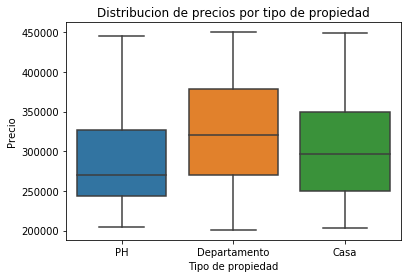

In [16]:
propiedades_pE =  propiedades_pD[(propiedades_pD.price<450000) & (propiedades_pD.price>200000)]
                            
                                 
sns.boxplot(data = propiedades_pE, x = 'property_type', y = "price")

plt.title('Distribucion de precios por tipo de propiedad')

plt.xlabel('Tipo de propiedad')
plt.ylabel('Precio')

#### Punto F

**Comentario para el evaluador**

Cuando realizo el grafico de pairplot, me sale este warning. Estuve buscando, pero no encontré nada. Sin embargo, los gráficos se visualizan más abajo.

C:\Users\patrimoore\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:444: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # will not work for two columns.
C:\Users\patrimoore\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:444: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # will not work for two columns.
C:\Users\patrimoore\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:444: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # will not work for two columns.
C:\Users\patrimoore\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:444: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # will not work for two columns.
C:\Users\patrimoore\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:444: RuntimeWarning: invalid value en

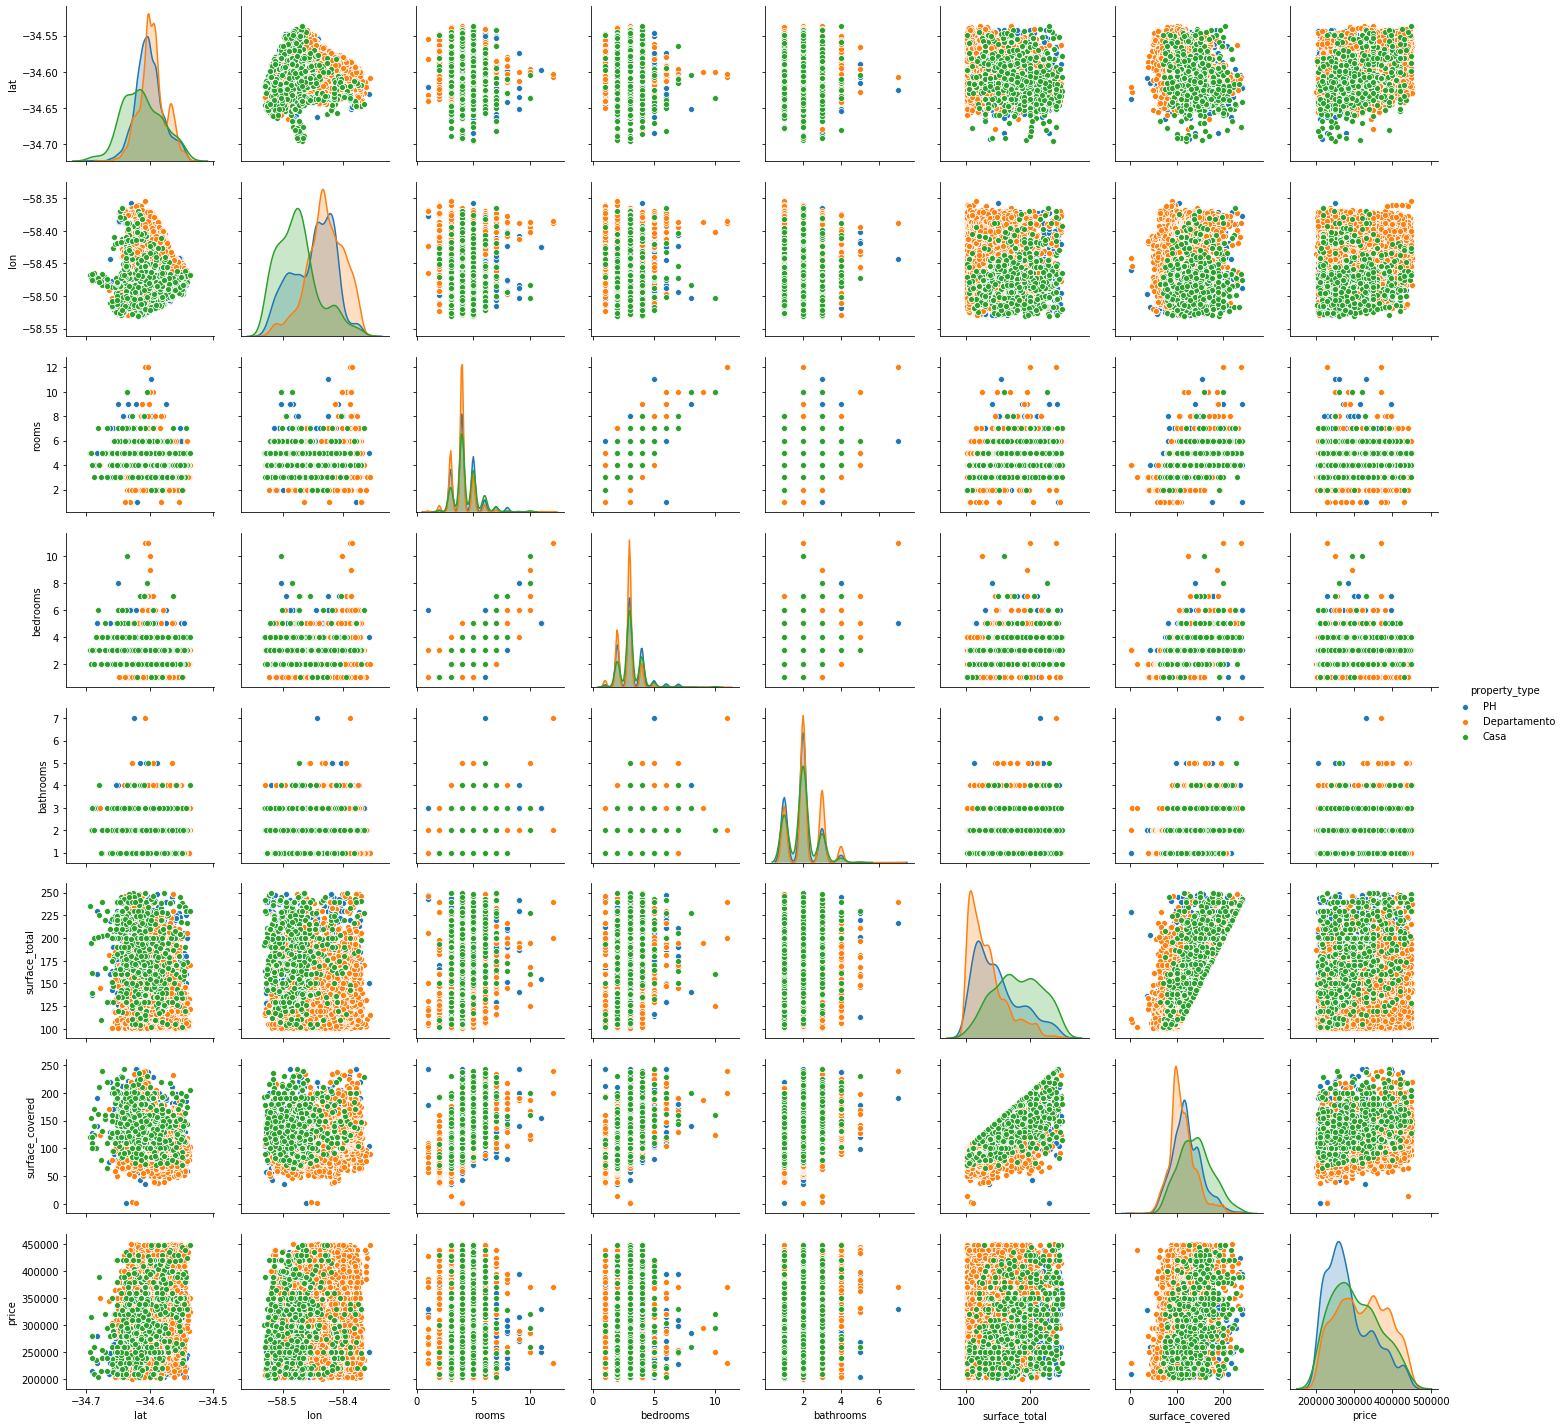

In [17]:
sns.pairplot(propiedades_pE, hue='property_type')

7. **Correlaciones:** Estudia la correlación entre las variables `rooms`, `bedrooms`, `bathrooms`, `surface_total`, `surface_covered`, `price`. ¿Cuáles son las mejores variables para predecir el precio?¿Qué diferencias encuentras según cada tipo de propiedad?

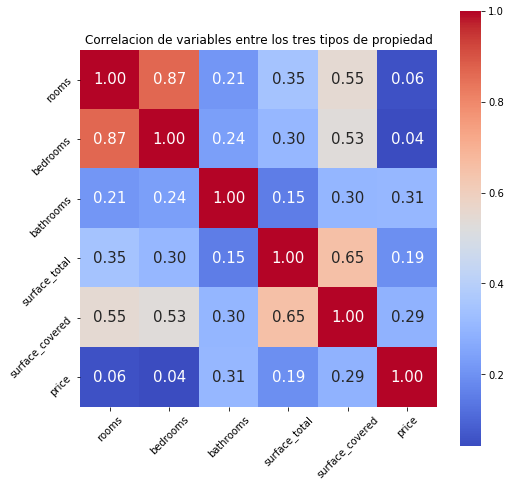

In [18]:
prop = propiedades_pE.filter(regex='rooms|bedrooms|bathrooms|surface_total|surface_covered|price|property_type')

corr = prop.drop(columns = 'property_type').corr()
plt.figure(figsize=(8,8))
sns.heatmap(corr, cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 15},
           xticklabels= prop.drop(columns = 'property_type').columns, 
           yticklabels= prop.drop(columns = 'property_type').columns,
           cmap= 'coolwarm')
plt.xticks(rotation = 45)
plt.yticks(rotation = 45)

plt.title('Correlacion de variables entre los tres tipos de propiedad')

plt.show()


**Como podemos observar en el heatmap, las mejores variables para predecir el precio son la cantidad de baños y la superficie cubierta.**

C:\Users\patrimoore\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


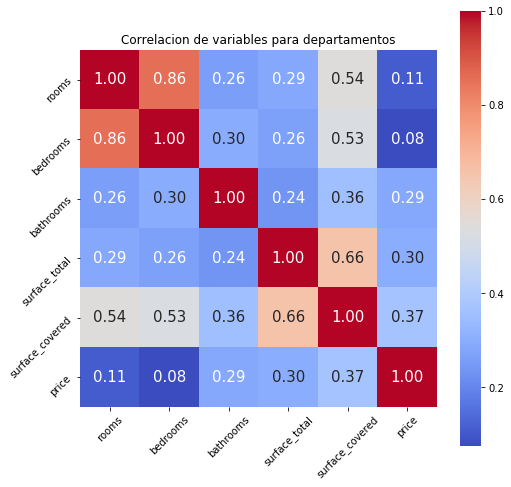

In [19]:
propiedades_p7a = prop[(propiedades_pD.property_type=='Departamento')]

corr = propiedades_p7a.drop(columns = 'property_type').corr()
plt.figure(figsize=(8,8))
sns.heatmap(corr, cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 15},
           xticklabels= propiedades_p7a.drop(columns = 'property_type').columns, 
           yticklabels= propiedades_p7a.drop(columns = 'property_type').columns,
           cmap= 'coolwarm')
plt.xticks(rotation = 45)
plt.yticks(rotation = 45)

plt.title('Correlacion de variables para departamentos')
plt.show()



**En el heatmap filtrado para los departamentos, vemos que la relación de la superficie cubierta aumenta, así también como la superficie total.** 

C:\Users\patrimoore\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


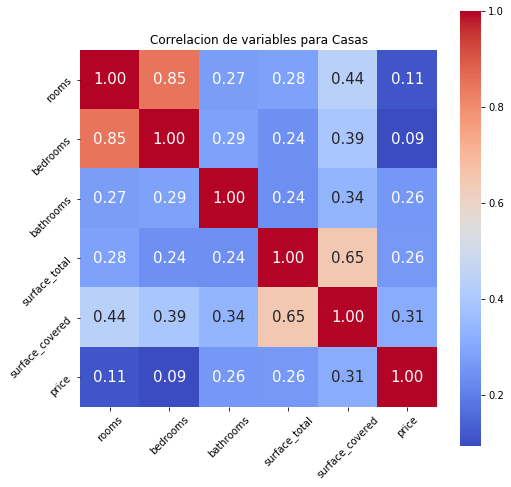

In [20]:
propiedades_p7b = prop[(propiedades_pD.property_type=='Casa')]

corr = propiedades_p7b.drop(columns = 'property_type').corr()
plt.figure(figsize=(8,8))
sns.heatmap(corr, cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 15},
           xticklabels= propiedades_p7b.drop(columns = 'property_type').columns, 
           yticklabels= propiedades_p7b.drop(columns = 'property_type').columns,
           cmap= 'coolwarm')
plt.xticks(rotation = 45)
plt.yticks(rotation = 45)

plt.title('Correlacion de variables para Casas')
plt.show()


**En este heatmap filtrado para las casas, la relación de superficie cubierta sobre el precio es la más predominante, a su vez también aumenta la relación de la superficie total sobre la que vimos en el heatmap general.**

C:\Users\patrimoore\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


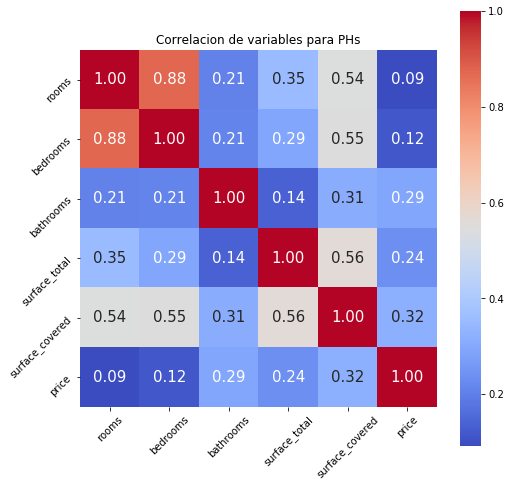

In [21]:
propiedades_p7c = prop[(propiedades_pD.property_type=='PH')]

corr = propiedades_p7c.drop(columns = 'property_type').corr()
plt.figure(figsize=(8,8))
sns.heatmap(corr, cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 15},
           xticklabels= propiedades_p7c.drop(columns = 'property_type').columns, 
           yticklabels= propiedades_p7c.drop(columns = 'property_type').columns,
           cmap= 'coolwarm')
plt.xticks(rotation = 45)
plt.yticks(rotation = 45)

plt.title('Correlacion de variables para PH''s')
plt.show()


**En este último heatmap, vemos que la variable de superficie cubierta y la cantidad de baños, son las que más se correlacionan para determinar el precio de una propiedad.**

**Como pudimos observar, las variables que más correlación tienen sobre el precio son la cantidad de baños, la cantidad de superficie cubierta y la cantidad de superficie total. Esta relación se repite en los 3 tipos de propiedades.**

### 2.1 Desafío

En el dataset provisto hay mucha información, más allá del problema planteado. Propone una pregunta que pueda ser respondida por el dataset e intenta responderla.¿Cuáles son los sesgos de la respuesta obtenida?(¿Cuán generalizable es la respuesta obtenida?)¿Necesitas información complementaria?¿Cómo la obtendrías?

Por ejemplo: ¿Cuál es el barrio más caro de Buenos Aires? Probablemente puedas responder esta pregunta con este dataset. Pero podria ocurrir que la respuesta esté sesgada. ¿Cómo? Tal vez las propiedades más caras no se publican de forma online, sino que utilizan otro canal de venta.


**¿Cuál es el barrio con más propiedades publicadas?**

Si notamos un patrón de que la mayoría de las propiedades publicadas pertenecen a un mismo barrio, esta respuesta puede significar varios motivos, uno de ellos puede ser la inseguridad. En el siguiente grafico veremos los 3 barrios con más propiedades publicadas.



Text(-8.825000000000003, 0.5, 'Cantidad')

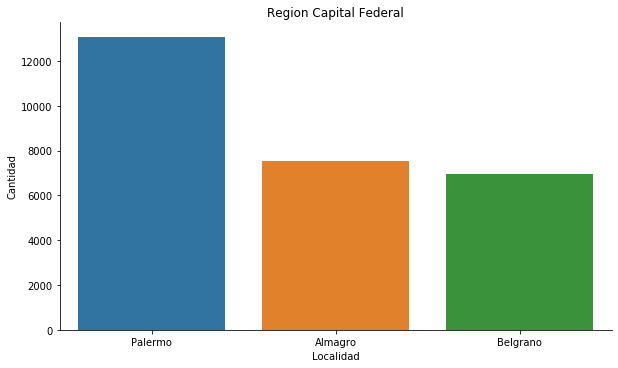

In [22]:
propiedades_capital3 = propiedades_capital[(propiedades_capital.l3=="Palermo")| (propiedades_capital.l3=="Belgrano")|(propiedades_capital.l3=="Almagro")]
g=sns.catplot(x = "l3", data = propiedades_capital3, kind = "count", height=5, aspect=1.7)
#g.fig.set_size_inches( 80,5)
plt.title('Region Capital Federal')
plt.xlabel('Localidad')
plt.ylabel('Cantidad')

In [23]:
datosextra = propiedades_capital3["l3"].value_counts()
print("Aquí podemos ver cuantas instancias hay para cada localidad:")
print(datosextra)




Aquí podemos ver cuantas instancias hay para cada localidad:
Palermo     13073
Almagro      7527
Belgrano     6935
Name: l3, dtype: int64


In [24]:
datoesxtra2 = propiedades_capital["l2"].value_counts()
print("Aquí vemos la cantidad de instancias en Capital Federal:")
print(datoesxtra2)

Aquí vemos la cantidad de instancias en Capital Federal:
Capital Federal    92539
Name: l2, dtype: int64


In [25]:
Palermo = 13073
Almagro = 7527
Belgrano = 6935

Total_capital = 92539

pt = round(Palermo/Total_capital*100,2)
pa = round(Almagro/Total_capital*100,2)
pb = round(Belgrano/Total_capital*100,2)

print("El porcentaje de propiedades publicadas en Palermo sobre el total de capital es: %",pt)
print("El porcentaje de propiedades publicadas en Almagro sobre el total de capital es: %",pa)
print("El porcentaje de propiedades publicadas en Belgrano sobre el total de capital es: %",pb)



El porcentaje de propiedades publicadas en Palermo sobre el total de capital es: % 14.13
El porcentaje de propiedades publicadas en Almagro sobre el total de capital es: % 8.13
El porcentaje de propiedades publicadas en Belgrano sobre el total de capital es: % 7.49


Como pudimos observar, Palermo es el barrio con más propiedades publicadas en nuestro dataset. Sin embargo, esto no nos alcanza para decir que Palermo es el barrio más inseguro de la Capital Federal. ¿Por qué no? Porque tal vez hay otro factor para entender porque hay tantas propiedades en venta en Palermo. Por ejemplo, el aumento de las expensas puede ser un punto importante a la hora de tomar la decisión de querer vender la propiedad.

Para poder afirmar esto, necesitaríamos una base de datos con las denuncias que se hicieron en las comisarías de todo Capital Federal, para así poder ver cuál es el barrio con más hechos delictivos. Esta información está siendo utilizada por la Policía, la cual realizo un tablero dinámico donde podemos observar los barrios más golpeados por la inseguridad.
https://mapa.seguridadciudad.gob.ar/

### 3. Machine Learning

En esta sección, debes entrenar dos modelos de Machine Learning - uno de vecinos más cercanos y otro de árboles de decisión -  para predecir el precio de las propiedades tipo `Departamento`, `PH` y `Casa`  en la Ciudad Autónoma de Buenos Aires (`Capital Federal`). Para ello, no debes olvidarte de:

* Elegir una métrica apropiada para evaluar los resultados de los modelos.
* Seleccionar las variables predictoras (`X`) y la variable a predecir (`y`). 
* Realizar un Train/Test split de los datos.
* Generar un modelo *benchmark* y evaluarlo.
* Entrenar un modelo de vecinos más cercanos y un modelo de árbol de decisión con hiperparámetros iniciales de su elección.
* Evaluar los modelos obtenidos. Para ello, evalúa la métrica elegida en el conjunto de Test y en el conjunto de Train. También, realiza gráficos de valores reales vs. valores predichos.
* Mejorar el desempeño de sus modelos optimizando el número de vecinos y la profundidad del árbol, respectivamente.
* Entre los modelos entrenados, ¿cuál elegirías para utilizar?¿Por qué? 
* Ser **crítico/a** con la metodología utilizada. Por ejemplo, responde las siguientes preguntas: ¿Qué información no estás usando que podría ayudar al modelo?¿Qué información puede estar demás o repetida?

Estos lineamientos corresponden al **mínimo entregable** de esta sección.


**Importante:** para asegurarnos que trabajes con un dataset apropiados, debes volver a cargar los datos y realizar el siguiente filtrado:

1. Selecciona aquellas propiedades en Capital Federal y cuyo tipo de propiedad es Departamento, PH o Casa.
1. Selecciona aquellas propiedades cuya superficie total es menor a 1000 m2 y mayor a 15 m2.
1. Selecciona aquellas propiedades cuya precio es menor 4000000 dólares.
1. Selecciona las columnas `rooms`, `bedrooms`, `bathrooms`, `surface_total`, `surface_covered` y `price`.
1. Descarta aquellas instacias con valores faltantes.

**Checkpoint:** deberías obtener un dataset con 81019 instacias y 6 columnas.

A lo largo de la sección, voy a estar utilizando el coeficiente estadístico (R2) como medida para evaluar los errores. Lo elegí porque me parece la mejor manera de evaluar un modelo, tanto por su simplicidad como por su visualización numérica final. El R2 igual a 0, indica que nuestro modelo tiene una precisión del 0%, mientras que, si el R2 es igual a 1, nuestro modelo tiene una precisión del 100%. De esta forma, mientras nuestro R2 sea más cercano al 1, mejor va a ser nuestro modelo.

In [26]:
propiedades_p3 = propiedades_capital[(propiedades_capital.property_type=="Departamento") | (propiedades_capital.property_type=="PH") | (propiedades_capital.property_type=="Casa") ]


propiedades_p3a = propiedades_p3[((propiedades_p3.surface_total<=1000)&(propiedades_p3.surface_total>=15))]
propiedades_p3b = propiedades_p3a[(propiedades_p3a.price<=4000000)]

propiedades_p3c = propiedades_p3b.filter(regex='rooms|bedrooms|bathrooms|surface_total|surface_covered|price')

propiedades_ml = propiedades_p3c.dropna()



propiedades_ml.shape



(81019, 6)

In [27]:
from sklearn.model_selection import train_test_split

#Elijo las metricas que mas se correlacionan con el precio, como pudimos observar en los heatmap de correlacion que hicimos anteriormente
X = propiedades_ml[['bathrooms','surface_covered','surface_total']]
y = propiedades_ml.price


#Luego, realizo un split entre train y test del dataset

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)



In [38]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score

#Realizamos nuestro modelo de Benchmark
linear_model = LinearRegression()

linear_model.fit(X_train, y_train)

y_train_pred_lin = prop_tree.predict(X_train)
y_test_pred_lin = prop_tree.predict(X_test)

r2_train_lin = r2_score(y_train, y_train_pred_lin)
r2_test_lin = r2_score(y_test, y_test_pred_lin)
print(f'R-cuadrado en Train mediante regresion lineal: {r2_train_lin}')
print(f'R-cuadrado en Test mediante regresion lineal: {r2_test_lin}')





R-cuadrado en Train mediante regresion lineal: 0.5844333913686437
R-cuadrado en Test mediante regresion lineal: 0.5852162030595955


Según el modelo de Benchmark, nuestro R2 de testeo es de 0.585. Esto quiere decir que tiene una precisión del 58.5%. Por lo tanto, el modelo que elijamos posteriormente tiene que ser más acertado que este último.

In [29]:
from sklearn.neighbors import *


#Comienzo entrenando mi primer modelo, usando vecinos cercanos

prop_knn = KNeighborsRegressor(n_neighbors=1)

prop_knn.fit(X_train, y_train)


y_train_pred_knn = prop_knn.predict(X_train)
y_test_pred_knn = prop_knn.predict(X_test)





Modelo: Vecinos cercanos
R-cuadrado en Train mediante vecinos cercanos: 0.8523010617213775
R-cuadrado en Test mediante vecinos cercanos: 0.6623405394517075


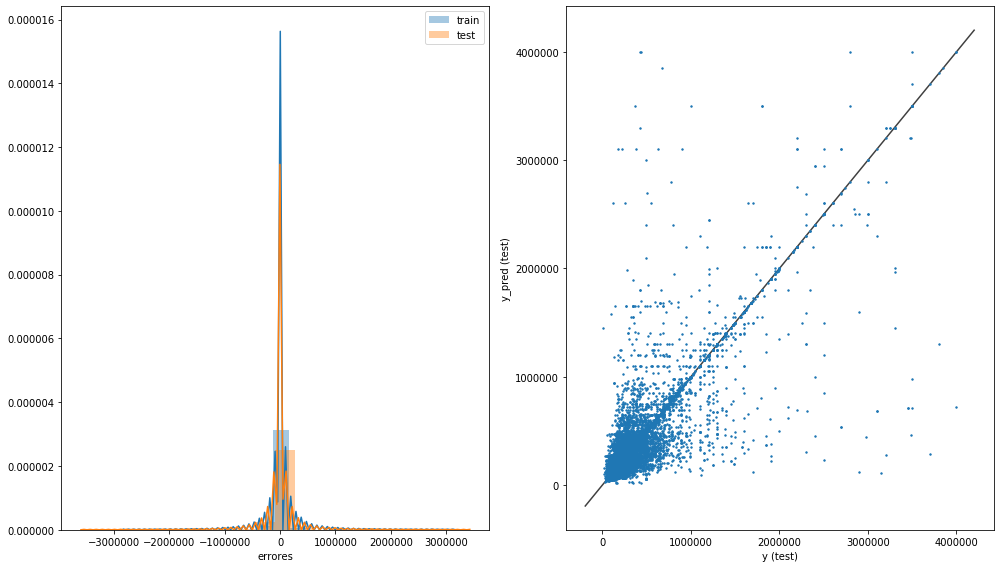

In [30]:

#Grafico los errores y las predicciones que se realizaron entre train y test

print(f'Modelo: Vecinos cercanos')

r2_train_knn = r2_score(y_train, y_train_pred_knn)
r2_test_knn = r2_score(y_test, y_test_pred_knn)
print(f'R-cuadrado en Train mediante vecinos cercanos: {r2_train_knn}')
print(f'R-cuadrado en Test mediante vecinos cercanos: {r2_test_knn}')
    
plt.figure(figsize = (14,8))
plt.subplot(1,2,1)
sns.distplot(y_train - y_train_pred_knn, bins = 20, label = 'train')
sns.distplot(y_test - y_test_pred_knn, bins = 20, label = 'test')
plt.xlabel('errores')
plt.legend()


ax = plt.subplot(1,2,2)
ax.scatter(y_test,y_test_pred_knn, s =2)
    
lims = [
np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes]
    ]
    
ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
plt.xlabel('y (test)')
plt.ylabel('y_pred (test)')
    
plt.tight_layout()
plt.show()


In [31]:
#Entreno mi segundo modelo, usando arbol de decision

prop_tree = DecisionTreeRegressor(max_depth=3, random_state = 42)

prop_tree.fit(X_train, y_train)

y_train_pred_tree = prop_tree.predict(X_train)
y_test_pred_tree = prop_tree.predict(X_test)



Modelo: Arbol de decision
R-cuadrado en Train mediante arbol de decision: 0.5844333913686437
R-cuadrado en Test mediante arbol de decision: 0.5852162030595955


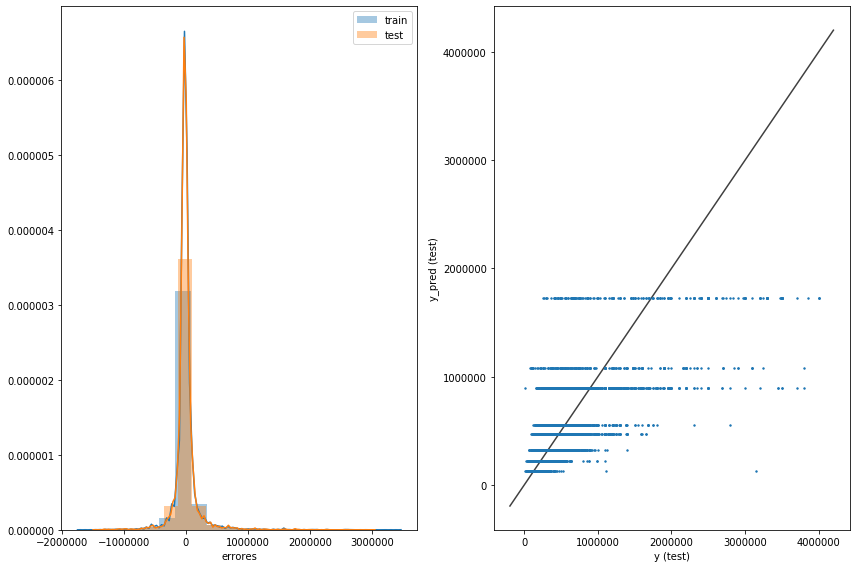

In [32]:
#Grafico los errores y la prediccion realizada entre train y test    

print(f'Modelo: Arbol de decision')

r2_train_tree = r2_score(y_train, y_train_pred_tree)
r2_test_tree = r2_score(y_test, y_test_pred_tree)
print(f'R-cuadrado en Train mediante arbol de decision: {r2_train_tree}')
print(f'R-cuadrado en Test mediante arbol de decision: {r2_test_tree}')
    
plt.figure(figsize = (12,8))
plt.subplot(1,2,1)
sns.distplot(y_train - y_train_pred_tree, bins = 20, label = 'train')
sns.distplot(y_test - y_test_pred_tree, bins = 20, label = 'test')
plt.xlabel('errores')
plt.legend()


ax = plt.subplot(1,2,2)
ax.scatter(y_test,y_test_pred_tree, s =2)
    
lims = [
np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes]
    ]
    
ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
plt.xlabel('y (test)')
plt.ylabel('y_pred (test)')
    
plt.tight_layout()
plt.show()

In [33]:
lista_r2_train_knn = []
lista_r2_test_knn = []

k_vecinos = [1,2,3,4,5,6,7,8,9,10,12,13]

# Generamos un loop sobre los distintos valores de k 
for k in k_vecinos:
    
    
    
    # Definir el modelo con el valor de vecinos deseado
    prop_knn2 = KNeighborsRegressor(n_neighbors=k)
    
    
    # Entrenar el modelo
    prop_knn2.fit(X_train, y_train)
    
    # Predecimos el set de entrenamiento y de testeo
    y_train_pred_knn2 = prop_knn2.predict(X_train)
    y_test_pred_knn2 = prop_knn2.predict(X_test)
    
    # Evaluamos el set de entrenamiento y de testeo
    r2_train_knn2 = r2_score(y_train, y_train_pred_knn2)
    r2_test_knn2 = r2_score(y_test, y_test_pred_knn2)
    
    # Agregar la información a las listas
    lista_r2_train_knn.append(r2_train_knn2)
    lista_r2_test_knn.append(r2_test_knn2)
    

Text(0, 0.5, 'R2')

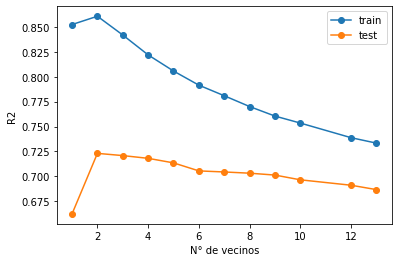

In [34]:
plt.plot(k_vecinos, lista_r2_train_knn,'o-',label='train')
plt.plot(k_vecinos, lista_r2_test_knn,'o-',label='test')
plt.legend()
plt.xlabel('N° de vecinos')
plt.ylabel('R2')

In [35]:
lista_r2_train_tree = []
lista_r2_test_tree = []

m_depth = [1,2,3,4,5,6,7,8,9,10,12,13]

# Generamos un loop sobre los distintos valores de m
for m in m_depth:
    
    # Vamos a repetir el siguiente bloque de código
    
    # Definir el modelo con el valor de max_depth deseado
    prop_tree2 = DecisionTreeRegressor(max_depth=m, random_state = 42)
    
    
    # Entrenar el modelo
    prop_tree2.fit(X_train, y_train)
    
    # Predecimos el set de entrenamiento y de testeo
    y_train_pred_tree2 = prop_tree2.predict(X_train)
    y_test_pred_tree2 = prop_tree2.predict(X_test)
    
    # Evaluamos el set de entrenamiento y de testeo
    r2_train_tree2 = r2_score(y_train, y_train_pred_tree2)
    r2_test_tree2 = r2_score(y_test, y_test_pred_tree2)
    
    # Agregar la información a las listas
    lista_r2_train_tree.append(r2_train_tree2)
    lista_r2_test_tree.append(r2_test_tree2)

Text(0, 0.5, 'R2')

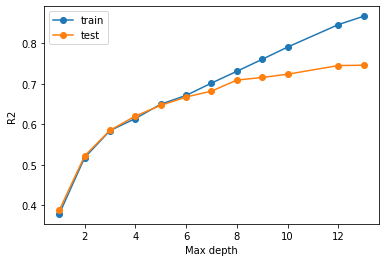

In [36]:
plt.plot(k_vecinos, lista_r2_train_tree,'o-',label='train')
plt.plot(k_vecinos, lista_r2_test_tree,'o-',label='test')
plt.legend()
plt.xlabel('Max depth')
plt.ylabel('R2')

Luego de analizar ambos modelos, con varios hiperparametros, llego a la conclusión de que el mejor modelo es el de Vecinos Cercanos.

¿Por qué? Porque es el que tiene el mejor R2, es decir el que más se acerca a uno. Esto significa que está más cerca del 100% de predicción, que es el valor al que queremos llegar. Usando un K = 2, tenemos un R2 de aproximadamente 0.723. 
Mientras tanto, en el modelo de árbol de decisión, nuestro R2 máximo llega cuando max_depth = a 12. En este punto, nuestro R2 es de 0.746, pero estamos teniendo un modelo muy complejo y profundo.

Por esto mismo, haciendo costo/beneficio, creo que nuestro mejor modelo es el de vecinos cercanos, ya que usando un K bajo llegamos a un R2 similar que el indicado en el modelo de árbol decisión, siendo este un modelo muy complejo.


Respondiendo el último punto, creo que agregar la ubicación de cada propiedad le daría al modelo un input más certero que el actual. ¿Por qué? Porque actualmente nuestro modelo cotiza una propiedad con los mismos atributos que utilizamos para entrenarlo (cantidad de baños, cantidad de m2 totales, y cantidad de m2 cubiertos), sin tener en cuenta su ubicación. No es lo mismo un departamento de 100 m2 en Palermo que uno de igual tamaño en La Boca.

Por último, considero que el campo "rooms" y "bedrooms" contiene información repetida. Llego a esta conclusión debido a que cuando uno publica una propiedad, se tiene en cuenta la cantidad de ambientes (rooms), ya que el comprador puede convertir ese ambiente en una habitación si él quisiera.


